In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from scipy.linalg import lu

In [5]:
# Load MNIST-like digits dataset from sklearn
digits = load_digits()
X = digits.data  # shape (1797, 64)
y = digits.target

print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


### PCA (Principal Component Analysis)

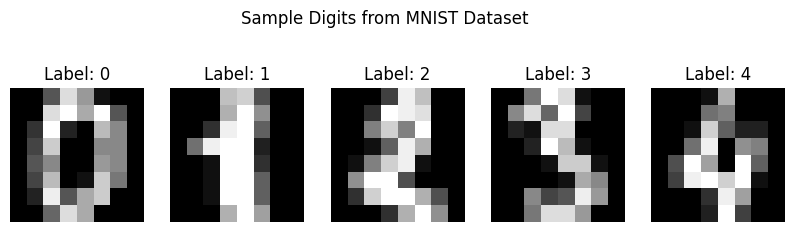

In [4]:
# Show a few sample images
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(X[i].reshape(8, 8), cmap='gray')
    ax.set_title(f"Label: {y[i]}")
    ax.axis('off')
plt.suptitle("Sample Digits from MNIST Dataset")
plt.show()

In [9]:
# --- Matrix Decomposition Concepts Step-by-Step ---

### 1. Matrix Representation
print("Each image is 8x8, represented as a 64-dimensional vector.")
print(f"Shape of data matrix X: {X.shape}")  # 1797 samples, each with 64 features

Each image is 8x8, represented as a 64-dimensional vector.
Shape of data matrix X: (1797, 64)


In [10]:
### 2. Centering the Data
X_mean = np.mean(X, axis=0)
X_centered = X - X_mean

### 3. Covariance Matrix
cov_matrix = np.cov(X_centered.T)  # shape (64, 64)
print(f"Shape of Covariance Matrix: {cov_matrix.shape}")

### 4. Eigen Decomposition (PCA manually)
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Sort eigenvalues and eigenvectors
sorted_idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_idx]
eigenvectors = eigenvectors[:, sorted_idx]

Shape of Covariance Matrix: (64, 64)


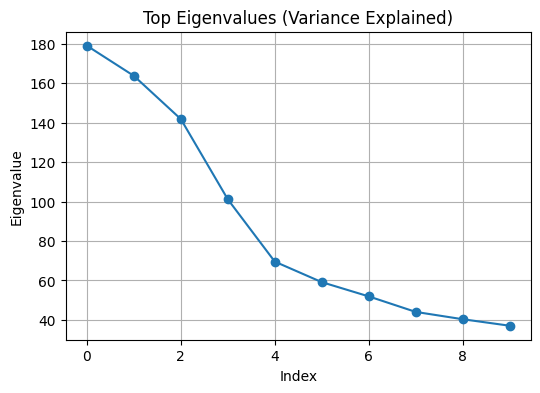

In [11]:
# Plot top 5 eigenvalues
plt.figure(figsize=(6, 4))
plt.plot(eigenvalues[:10], marker='o')
plt.title("Top Eigenvalues (Variance Explained)")
plt.xlabel("Index")
plt.ylabel("Eigenvalue")
plt.grid()
plt.show()

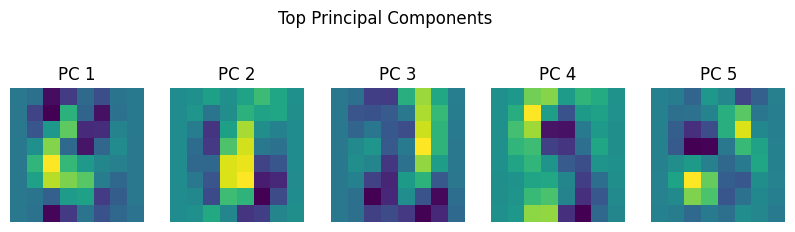

In [12]:
# Visualize first 5 eigenvectors (as images)
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(eigenvectors[:, i].reshape(8, 8), cmap='viridis')
    ax.set_title(f"PC {i+1}")
    ax.axis('off')
plt.suptitle("Top Principal Components")
plt.show()

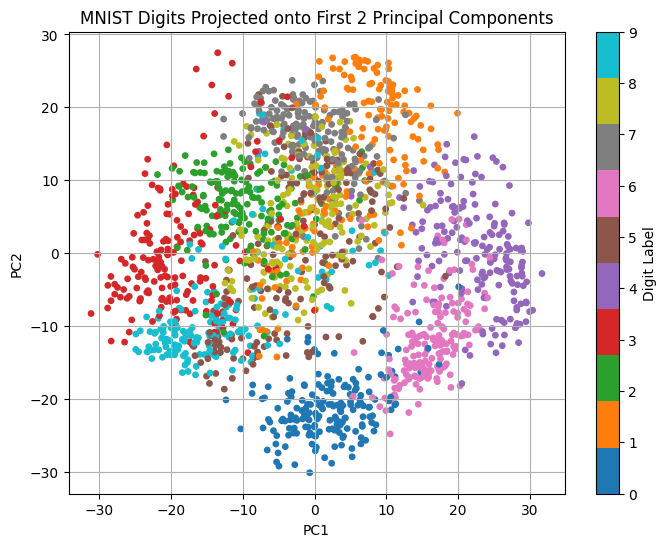

In [ ]:
### 5. Project data to lower dimension
X_pca = X_centered @ eigenvectors[:, :2]  # Project onto first 2 PCs # @ does matrix multiplication

# Plot in reduced 2D space
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', s=15)
plt.title("MNIST Digits Projected onto First 2 Principal Components")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(scatter, label="Digit Label")
plt.grid()
plt.show()

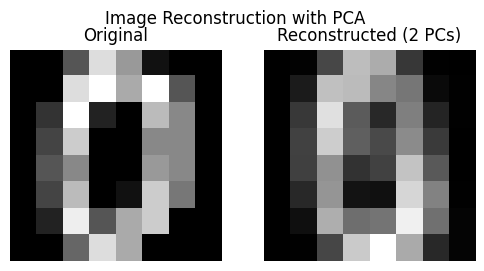

In [ ]:
### 6. Reconstruction from PCA
# Reconstruct from top 2 PCs
X_approx = X_pca @ eigenvectors[:, :2].T + X_mean #since we subtracted X_mean we need to add it to reconstruct X_approx

# Show original and reconstructed image
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
axes[0].imshow(X[0].reshape(8, 8), cmap='gray')
axes[0].set_title("Original")
axes[1].imshow(X_approx[0].reshape(8, 8), cmap='gray')
axes[1].set_title("Reconstructed (2 PCs)")
for ax in axes:
    ax.axis('off')
plt.suptitle("Image Reconstruction with PCA")
plt.show()

### SVD (Singular Value Decomposition)

In [15]:
### 7. Singular Value Decomposition (SVD)
U, S, VT = np.linalg.svd(X_centered, full_matrices=False)
print("Shape of U:", U.shape)
print("Shape of S:", S.shape)
print("Shape of VT:", VT.shape)

Shape of U: (1797, 64)
Shape of S: (64,)
Shape of VT: (64, 64)


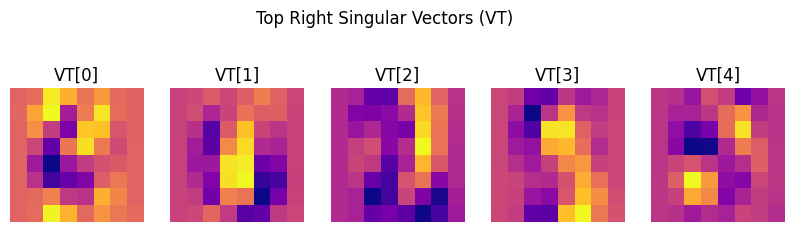

In [16]:
# Visualize the top 5 right singular vectors (VT rows)
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(VT[i].reshape(8, 8), cmap='plasma')
    ax.set_title(f"VT[{i}]")
    ax.axis('off')
plt.suptitle("Top Right Singular Vectors (VT)")
plt.show()

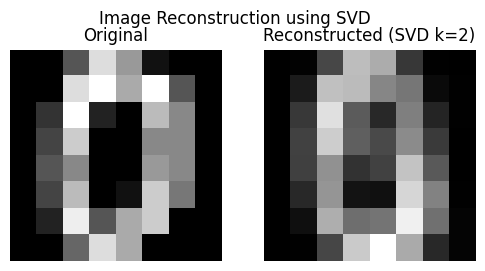

In [17]:
### 8. Low Rank Approximation with SVD
k = 2
X_svd_approx = (U[:, :k] @ np.diag(S[:k]) @ VT[:k, :]) + X_mean

# Show original and SVD-reconstructed image
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
axes[0].imshow(X[0].reshape(8, 8), cmap='gray')
axes[0].set_title("Original")
axes[1].imshow(X_svd_approx[0].reshape(8, 8), cmap='gray')
axes[1].set_title(f"Reconstructed (SVD k={k})")
for ax in axes:
    ax.axis('off')
plt.suptitle("Image Reconstruction using SVD")
plt.show()

### LU Decomposition

In [ ]:
### 9. LU Decomposition (example on small matrix)

from scipy.linalg import lu

A = np.array([[4, 3], [6, 3]])
P, L, U = lu(A)

print("Original Matrix A:\n", A)
print("Permutation Matrix P:\n", P)
print("Lower Triangular Matrix L:\n", L)
print("Upper Triangular Matrix U:\n", U)
print("Reconstructed A from LU: \n", P @ L @ U)


Original Matrix A:
 [[4 3]
 [6 3]]
Permutation Matrix P:
 [[0. 1.]
 [1. 0.]]
Lower Triangular Matrix L:
 [[1.         0.        ]
 [0.66666667 1.        ]]
Upper Triangular Matrix U:
 [[6. 3.]
 [0. 1.]]
Reconstructed A from LU: 
 [[4. 3.]
 [6. 3.]]
